<a href="https://colab.research.google.com/github/240609/MLF/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 8.87457308  8.53148228]
 [ 9.78673506  5.43416393]
 [12.44111414 15.46262824]]


(3, 2)

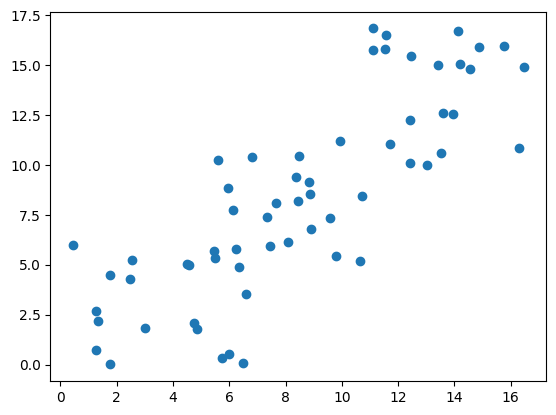

In [79]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

loaded_points = np.load('sample_data/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

k_clusters = 3

def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:

    initial_clusters = np.random.choice(points.shape[0], k_clusters, replace = False)
    initial_clusters = points[initial_clusters, :]

    return initial_clusters

initial_clusters = initialize_clusters(loaded_points, k_clusters)
print(initial_clusters)
initial_clusters.shape


In [80]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:


    distances_array = np.linalg.norm(points - centroid, axis=1)
    #distances_array = np.linalg.norm(points[:, np.newaxis] - centroid, axis=2)
    #print(distances_array)


    return distances_array

distances_array = calculate_metric(loaded_points, initial_clusters[0])
#print(distances_array)
distances_array.shape

(60,)

In [81]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:

    distances_array = np.asarray([calculate_metric(points, centroid) for centroid in centroids_points])


    return distances_array

all_distances = compute_distances(loaded_points, initial_clusters)
#print(all_distances)
all_distances.shape

(3, 60)

In [82]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:

    assigned_centroids = np.argmin(distances, axis=0)


    return assigned_centroids

assigned_centroids = assign_centroids(all_distances)
#assigned_centroids = np.transpose(assigned_centroids)
print(assigned_centroids.shape)
#print(assigned_centroids)

(60,)


In [83]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:


    minimal_distances = distances[assigned_centroids, np.arange(distances.shape[1])]
    objective_function_value = np.sum(minimal_distances)


    return objective_function_value

objective_function_value = calculate_objective(assigned_centroids, all_distances)
objective_function_value

225.41187031910962

In [84]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:


    new_clusters = []
    for cluster_id in range(k_clusters):
        j = np.where(assigned_centroids == cluster_id)
        points_sel = points[j]
        new_clusters.append(np.mean(points_sel, axis=0))

    new_clusters = np.asarray(new_clusters)


    return new_clusters


new_clusters = calculate_new_centroids(loaded_points, assigned_centroids, k_clusters)
print(new_clusters)
new_clusters.shape

[[ 8.0489165   8.8391868 ]
 [ 5.19783281  3.58247642]
 [13.58564413 14.56674125]]


(3, 2)

In [85]:
def fit(points: np.ndarray, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:

    centroid_points = initialize_clusters(points, k_clusters)
    last_objective = 10000.0
    n_of_oterations = 1000

    for _ in range(n_of_oterations):
        distances = compute_distances(points, centroid_points)
        assigned_centroids = assign_centroids(distances)
        objective_function_value = calculate_objective(assigned_centroids, distances)

        if abs(last_objective - objective_function_value) < error:
            break

        centroid_points = calculate_new_centroids(points, assigned_centroids, k_clusters)
        last_objective = objective_function_value



    return centroid_points, last_objective


centroid_points, last_objective = fit(loaded_points, k_clusters, 1000)
print(centroid_points)
print(last_objective)

[[13.58564413 14.56674125]
 [ 3.94687552  3.22672218]
 [ 8.85422796  8.46194624]]
150.0191980544267


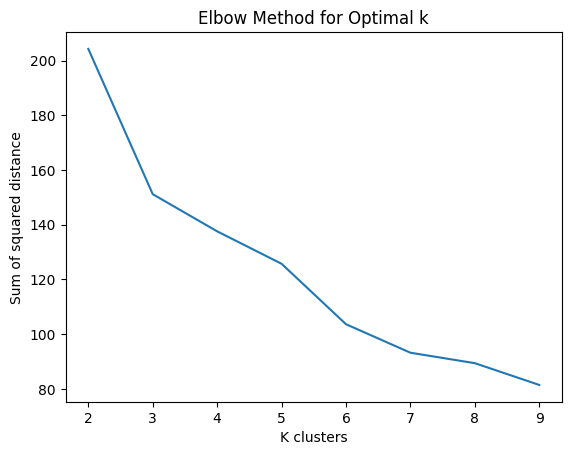

In [86]:
k_all = range(2, 10)
all_objective = []

for k in k_all:
    centroid_points, last_objective = fit(loaded_points, k, 1000)
    all_objective.append(last_objective)

plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.show()